In [4]:
%matplotlib inline
from RootLocus import *

# Root locus
## Open-loop systeem:
$P(s) = \frac{(s+1.5)}{s(s+1)(s+2)(s+4)} = \frac{(s+1.5)}{s^4+7s^3+14s^2+8s}$
This system has a zero in -1.5 and poles in 0,-1, -2 and -4. The system is not BIBO-stable because not all the poles (s=0) are in the open left halfplane. The response on a step input is: <br> $Y(s) = P(s)  \frac{1}{s} = \frac{(s+1.5)}{s^2(s+1)(s+2)(s+4)} = \frac{-5}{192}\frac{1}{s+4}+\frac{1}{16}\frac{1}{s+2}+\frac{1}{6}\frac{1}{s+1} - \frac{13}{64}\frac{1}{s} + \frac{3}{16}\frac{1}{s^2} \Rightarrow y(t) = \frac{-5}{192} e^{-4t} + \frac{1}{16} e^{-2t} + \frac{1}{6} e^{-t} - \frac{13}{64}  + \frac{3}{16} t $ 


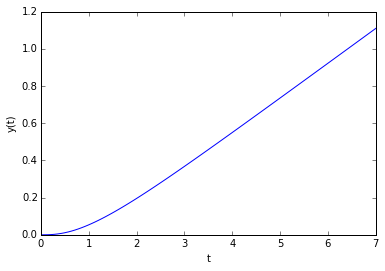

(array([-0.02604167,  0.0625    ,  0.16666667, -0.203125  ,  0.1875    ]), array([-4., -2., -1.,  0.,  0.]), array([ 0.]))


In [6]:
# Enter numerator
num = [1,1.5]
# Enter denominator
den = [1,7,14,8,0]
# Makes system
sys = control.tf(num,den)
# Draw step response: using http://python-control.sourceforge.net/manual/matlab_strings.html#matlab.step
y,t = control.step(sys)
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()
# Defining P(s)*(1/s) and calculating the partial fraction decomposition
# using scipy.signal.residu(num,den) -> 
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.residue.html
imp_num = [1,1.5]
imp_den = [1,7,14,8,0,0]
print sig.residue(imp_num,imp_den)

In the step respose we see clearly the term t (caused by the pole in 0). We can see that a bounded input not cause a bounded output (not BIBO).

## Closed loop system
<img scr="Afbeelding19.png">
The transfer function of the closed loop system: $\frac{KP(s)}{1+KP(s)} = \frac{K(s+1.5)}{s(s+1)(s+2)(s+4)+K(s+1.5)} $. For small K the poles of the closed loop system are the poles of the open loop system. When K goes to infinity the poles of the close loop system become the zeros of the open loop system. The root locus plots the poles of the closed loop transfer function in the complex plane as function of the gain parameter. Because we have 4 poles and only one zero we expect (4-1) = 3 asymptote to infinity. These asymptotes makes an angle of (360°/3)=120°.

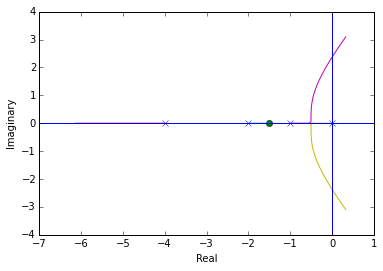

In [7]:
# Draw root locus using http://python-control.sourceforge.net/manual/matlab_strings.html#matlab.rlocus
control.root_locus(sys, np.linspace(0,60,3000),Plot=True)
draw_axis()
plt.show()

For K = 31 the poles just inside the lefthalf plane. So the system is BIBO stable.

[-5.45816583+0.j         -0.00573360+2.35941339j -0.00573360-2.35941339j
 -1.53036697+0.j        ]


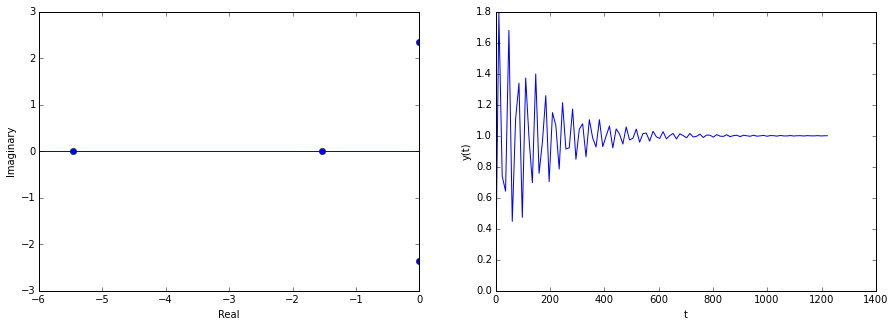

In [8]:
# Defining feedback system
C = control.tf(31,1)
# Using feedback according to http://nl.mathworks.com/help/control/examples/using-feedback-to-close-feedback-loops.html
controled_sys = control.feedback(C*sys,1)
poles = control.pole(controled_sys)
plt.subplot(1,2,1)
plt.plot(np.real(poles),np.imag(poles),'o')
draw_axis()
plt.xlabel('Real')
plt.ylabel('Imaginary')
print poles
plt.subplot(1,2,2)
draw_step_response_feedback(31,sys)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.show()


For K = 32 the poles are in the righthalf plane. The system is not stable anymore.

[-5.48646715+0.j          0.00794245+2.39171137j  0.00794245-2.39171137j
 -1.52941775+0.j        ]
[-5.48646715+0.j          0.00794245+2.39171137j  0.00794245-2.39171137j
 -1.52941775+0.j        ]


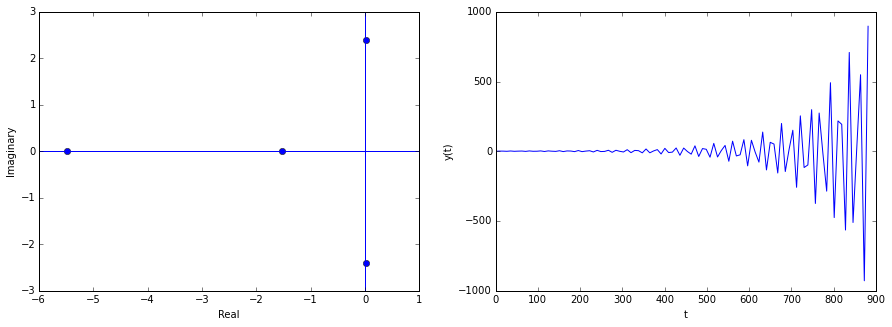

In [9]:
# Defining feedback system
C = control.tf(32,1)
# Using feedback according to http://nl.mathworks.com/help/control/examples/using-feedback-to-close-feedback-loops.html
controled_sys = control.feedback(C*sys,1)
poles = control.pole(controled_sys)
print poles
plt.subplot(1,2,1)
plt.plot(np.real(poles),np.imag(poles),'o')
draw_axis()
plt.xlabel('Real')
plt.ylabel('Imaginary')
print poles
plt.subplot(1,2,2)
draw_step_response_feedback(32,sys)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.show()


For K < 1.3 the poles have onley a real part. So we expect only terms of the form $ \alpha_i e^{-at}$ and $\beta$  in the step input response. We have no sine or cosine in the step inpulse. But for bigger K e.g 15 we can see the sines and cosines(due to the imaginairy parts of the poles) in the step input response.

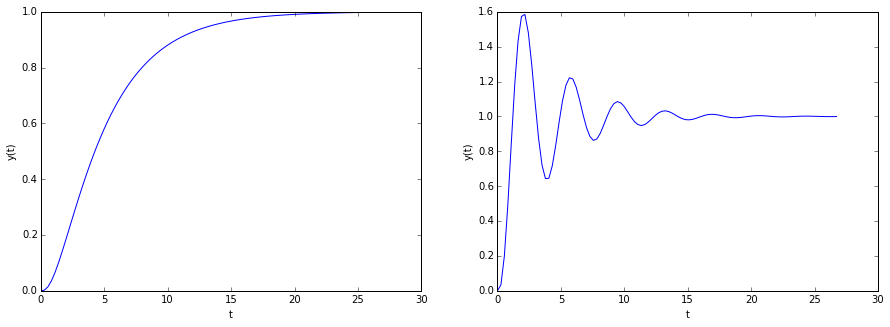

In [10]:
plt.subplot(1,2,1)
draw_step_response_feedback(1,sys)
plt.subplot(1,2,2)
draw_step_response_feedback(15,sys)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()



For small values of K the rise time is big. The bigger K the smaller the rise time.

## Try root locus by yourself.
Use the slider to change the value of the gain.

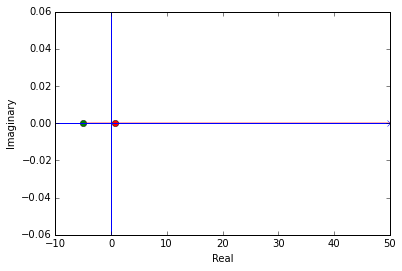

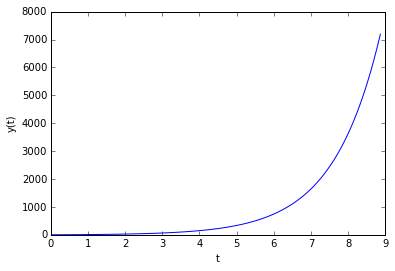

In [12]:
# Enter numerator
num_int = [1,5]
# Enter denominator
den_int = [1,-50]
# Makes system
sys_int = control.tf(num_int,den_int)

def poles(K):
    C = control.tf(K,1)
    controled_sys = control.feedback(C*sys_int,1)
    poles_k = control.root_locus(sys_int, np.linspace(0,100,3000),Plot=True)
    poles = control.pole(controled_sys)
    plt.plot(np.real(poles),np.imag(poles),'or')
    draw_axis()
    plt.show()
    draw_step_response_feedback(K,sys_int)
    plt.show()

interact(poles,K=(0.1,100,0.1))



